
### Nama: Nasywa Agiyan Nisa

### NIM: 24050122130073

### Mentor: Rusnanda Farhan



# **1. Impor Library**

In [216]:
# Library Umum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing dan Model Selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


## **2. Memuat Dataset**

Pada tahap ini, dataset perlu dimuat ke dalam notebook. Jika dataset dalam format CSV, bisa menggunakan pustaka pandas untuk membacanya. Perlu dipastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.


In [194]:
df = pd.read_csv("/content/Automobile_data.csv")

## **3. Exploratory Data Analysis (EDA) dan Data Prepocessing**  

  Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:  

1. **Memahami Struktur Data**  
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).  

2. **Analisis Duplikasi Data**  
   - Deteksi keberadaan data duplikat dalam dataset.  
   - Jika ditemukan duplikasi, lakukan penanganan seperti penghapusan entri yang redundan untuk memastikan kualitas data.  
   
3. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*).  
   - Tentukan langkah-langkah penanganan seperti imputasi atau penghapusan data yang hilang.  



In [195]:
#Melihat ringkasan informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [196]:
#Melihat ringkasan parameter statistik
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [197]:
#Menampilkan beberapa baris df
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Memeriksa duplikasi data

In [198]:
print(df.duplicated().sum())

0


Tidak terdapat duplikasi data sehingga tidak diperlukan penanganan lebih lanjut terkait duplikasi data.

### Memeriksa missing values

In [199]:
# Ubah '?' menjadi NaN langsung di df
df.replace('?', np.nan, inplace=True)

# Cek jumlah missing values setelah konversi
print(df.isna().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


<Axes: >

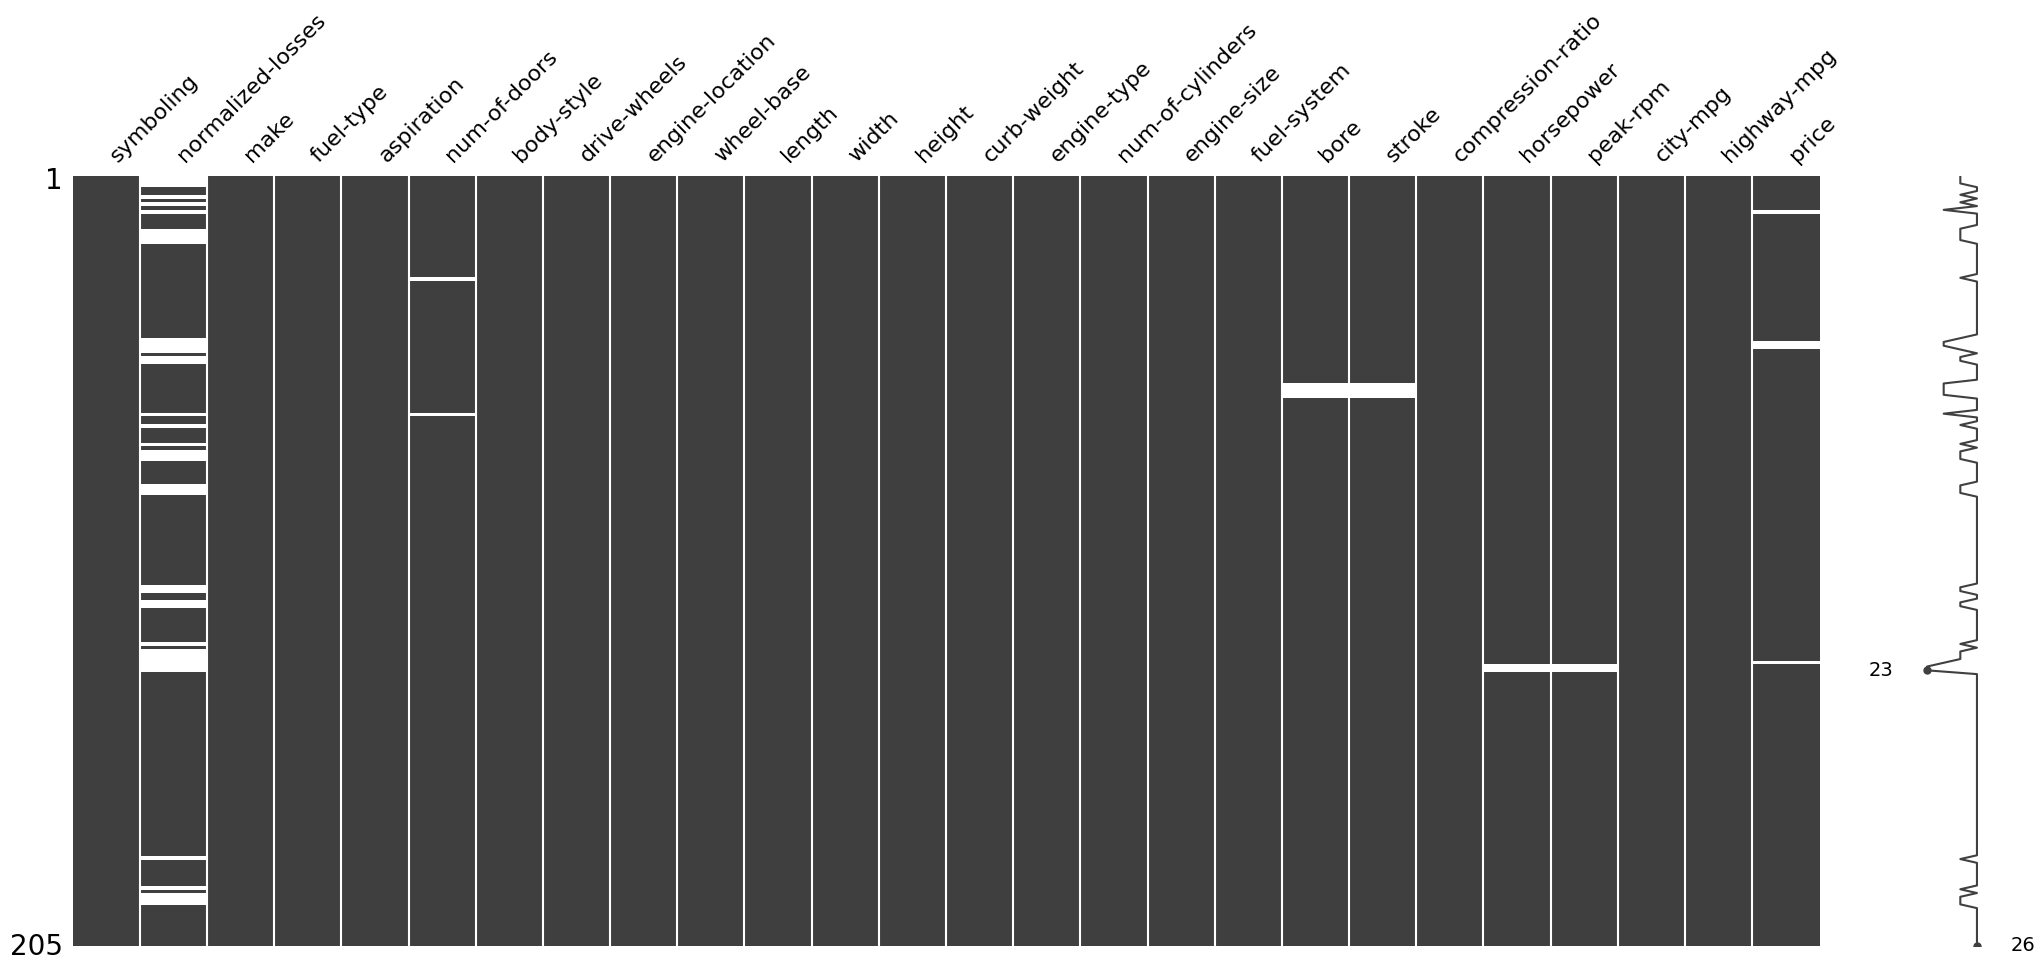

In [200]:
msno.matrix(df)

In [201]:
#Melihat persentase missing values
df.isna().mean()*100

,0
symboling,0.00000
normalized-losses,20.00000
make,0.00000
fuel-type,0.00000
aspiration,0.00000
num-of-doors,0.97561
body-style,0.00000
drive-wheels,0.00000
engine-location,0.00000
wheel-base,0.00000


### Penanganan Missing Values  

Berdasarkan hasil analisis, ditemukan missing values yang akan ditangani dengan metode berikut:  

- Jika jumlah missing values pada data numerik **kurang dari 75%**, maka akan diimputasi menggunakan **mean**.  
- Jika jumlah missing values pada data numerik **lebih dari 75%**, maka kolom tersebut akan **dihapus**.  
- Missing values pada data kategorik akan diimputasi menggunakan **modus**.

In [202]:
#Hitung persentase missing values
missing_percent = df.isnull().mean() * 100

#Hapus kolom yang memiliki lebih dari 75% missing values
cols_to_drop = missing_percent[missing_percent > 75].index
df = df.drop(columns=cols_to_drop)

#Isi kolom kategori dengan modus (mode)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().sum() > 0 else x)

#Isi kolom numerik yang memiliki missing value < 75% dengan mean
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [203]:
df.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [205]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Membuat DataFrame yang Sudah Bersih

In [206]:
df_cleaned=df.copy()

## **4. Feature Engineering**

In [207]:
# Memisahkan Fitur dan Target dari Dataset
target_column = 'price'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

In [208]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22


In [209]:
y.head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


In [210]:
# Encoding untuk fitur kategorikal pada X
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encoding untuk target label y
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (164, 25)
Test shape: (41, 25)


## **5. Modelling**

In [211]:
# Model ANN
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1)  # Output untuk regresi
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

# Callback ModelCheckpoint + EarlyStopping
checkpoint_cb = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12098.4873 - mae: 95.5086
Epoch 1: val_loss improved from inf to 11978.51562, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 11714.8105 - mae: 93.7730 - val_loss: 11978.5156 - val_mae: 96.6531
Epoch 2/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - loss: 11534.3975 - mae: 91.2778
Epoch 2: val_loss improved from 11978.51562 to 11933.16406, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 10633.0352 - mae: 87.8932 - val_loss: 11933.1641 - val_mae: 96.4549
Epoch 3/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 7549.3438 - mae: 76.0043
Epoch 3: val_loss improved from 11933.16406 to 11836.54492, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9884.0635 - mae: 86.2279 - val_loss: 11836.5449 - val_mae: 96.0380
Epoch 4/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14356.0635 - mae: 108.3953
Epoch 4: val_loss improved from 11836.54492 to 11

## **6. Evaluasi Model**

In [212]:
# Evaluasi
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2572.0588 - mae: 33.0080

Test Loss: 2529.8472
Test MAE: 32.6620


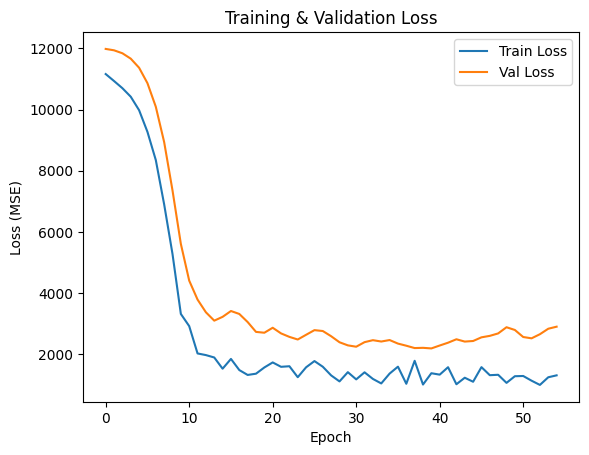

In [213]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

## **7. Inference**

In [217]:
model = load_model('best_model.keras')

In [218]:
# Muat model
model = load_model('best_model.keras')

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'symboling': [3],
    'normalized-losses': [122],
    'make': ['alfa-romero'],
    'fuel-type': ['gas'],
    'aspiration': ['std'],
    'num-of-doors': ['two'],
    'body-style': ['convertible'],
    'drive-wheels': ['rwd'],
    'engine-location': ['front'],
    'wheel-base': [88.6],
    'length': [168.8],
    'width': [64.1],
    'height': [48.8],
    'curb-weight': [2548],
    'engine-type': ['dohc'],
    'num-of-cylinders': ['four'],
    'engine-size': [130],
    'fuel-system': ['mpfi'],
    'bore': [3.47],
    'stroke': [2.68],
    'compression-ratio': [9.0],
    'horsepower': [111],
    'peak-rpm': [5000],
    'city-mpg': [21],
    'highway-mpg': [27]
})

# Daftar fitur kategorikal
categorical_features = [
    'make', 'fuel-type', 'aspiration', 'num-of-doors',
    'body-style', 'drive-wheels', 'engine-location',
    'engine-type', 'num-of-cylinders', 'fuel-system'
]

# Encoding fitur kategorikal
for feature in categorical_features:
    le = LabelEncoder()
    new_data[feature] = le.fit_transform(new_data[feature])

# Scaling fitur numerik
# Asumsikan scaler sudah dilatih sebelumnya pada data training
new_data_scaled = scaler.transform(new_data)

# Prediksi
predictions = model.predict(new_data_scaled)
print("Prediksi:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Prediksi: [[4314.3926]]
